## Génération de figures pour le chapitre « Réduction de dimension ».

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rc('font', **{'family':'sans', 'size': 20})

matplotlib.rcParams.update({
    'text.usetex': True,
    'text.latex.preamble': [r'\usepackage{mathptmx}',r'\usepackage{amsmath}', r'\usepackage{amssymb}',]})

In [3]:
prop_cycle = plt.rcParams['axes.prop_cycle']
def_colors = prop_cycle.by_key()['color']

In [4]:
import scipy.stats as st

## Maximisation de la variance 

In [5]:
n = 1000
p = 2

a = np.random.normal(size=(n, 1))
e = np.random.normal(scale=0.25, size=(n, p))

X = np.hstack((a, a)) + e

from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

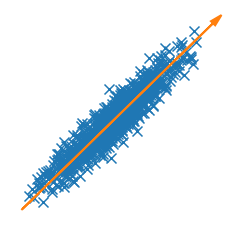

In [31]:
plt.figure(figsize=(4, 4))
t = plt.scatter(X[:, 0], X[:, 1], marker='x', s=100)

r = pca.components_[0, 0]/pca.components_[0, 1]

a = plt.arrow(-3, -3*r, 6.7, 6.7*r, fc=def_colors[1], ec=def_colors[1], 
          length_includes_head=True,
          head_width=0.2, head_length=0.4, lw='2')
plt.xlim([-3.5, 4.])
plt.ylim([-3.5, 4.])

plt.axis('off')
plt.savefig('../poly/figures/dimred/data_variance.pdf', bbox_inches='tight')

## Scree plots

In [32]:
from sklearn import datasets

bc = datasets.load_breast_cancer()
X = bc.data

from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# PCA
from sklearn import decomposition
pca = decomposition.PCA(n_components=30)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### Cumulative

In [33]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

0.95


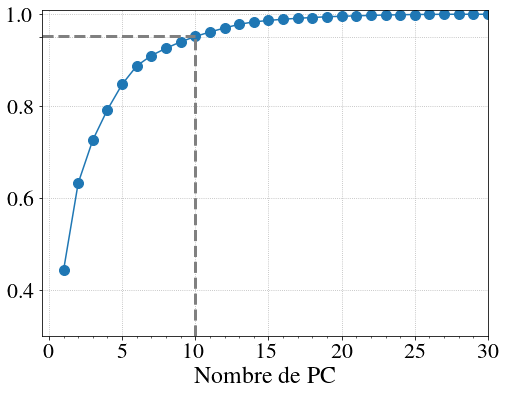

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))

cum_perc = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, 31), cum_perc,
         marker='o', markersize=10)

plt.xlabel("Nombre de PC", fontsize='24')
xt = [0]
xt.extend(range(4, 31, 5))

plt.plot([10, 10], [0.3, cum_perc[9]], ls='--', lw=3, color='grey')
plt.plot([-0.5, 10], [cum_perc[9], cum_perc[9]], lw=3, ls='--', color='grey')

plt.grid(ls=':')

plt.xlim([-0.5, 30])
plt.ylim([0.3, 1.01])

# xticks
majorLocator = MultipleLocator(5)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(1)
# major ticks
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
# for the minor ticks, use no labels; default NullFormatter
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(labelsize=22)

# yticks
ax.set_yticks([.4, .6, .8, .95, 1.])
ax.set_yticklabels(['0.4', '0.6', '0.8', '', '1.0'])

print('%.2f' % cum_perc[9])
plt.savefig('../poly/figures/dimred/scree_plot_cumul.pdf', bbox_inches='tight')

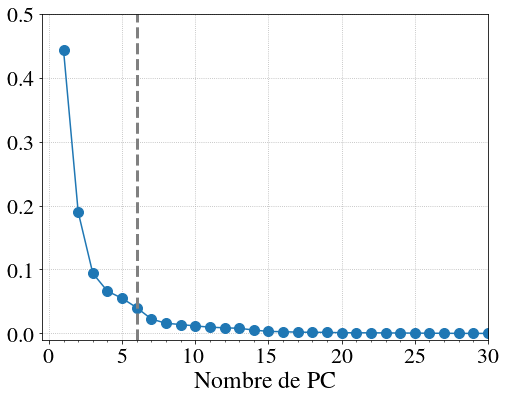

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))

perc = pca.explained_variance_ratio_
plt.plot(range(1, 31), perc, marker='o', markersize=10)
plt.xlabel("Nombre de PC", fontsize='24')
xt = [0]
xt.extend(range(4, 31, 5))

plt.grid(ls=':')

plt.plot([6, 6], [-0.01, 0.5], ls='--', lw=3, color='grey')

plt.xlim([-0.5, 30])
plt.ylim([-0.01, 0.5])

# xticks
majorLocator = MultipleLocator(5)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(1)
# major ticks
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
# for the minor ticks, use no labels; default NullFormatter
ax.xaxis.set_minor_locator(minorLocator)
ax.tick_params(labelsize=22)

# yticks
majorLocator = MultipleLocator(0.1)
majorFormatter = FormatStrFormatter('%.1f')
minorLocator = MultipleLocator(0.1)
# major ticks
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_major_formatter(majorFormatter)
# for the minor ticks, use no labels; default NullFormatter
ax.yaxis.set_minor_locator(minorLocator)

plt.savefig('../poly/figures/dimred/scree_plot.pdf', bbox_inches='tight')